在程式碼的世界中  
重複的程式碼被視為邪惡的  
不應該有多個相同或類似的程式碼存在於不同地方  

這邊討論最著名的物件導向原則：繼承  
繼承可以讓我們可以在兩個或以上的類別之間建構〝是一個〞的關係  
這邊會討論：  
* 基本繼承
* 從內建繼承
* 多重繼承
* 多型與鴨子型別

# 基本繼承
---

基本上  
每個類別都使用了繼承，都是繼承object這個特殊類別的子類別  
此類別提供了一些資料與行為(都是內部使用的雙底線行為)  
若我們沒有明確的繼承其他類別  
Python則會自動繼承object

In [1]:
class MySubClass(object):
    pass

父類別、超類別是指繼承來源  
子類別則是繼承者  
上述例子中  
父類別是object  
子類別是MySubClass  
子類別是從父類別衍伸出來，或者說擴充的父輩  

我們先從一個聯絡人管理系統開始  
它可以記錄多個人的姓名與電子郵件  
聯絡人類別負責在類別變數中維護聯絡人清單並初始化個人聯絡人的姓名與地址

In [2]:
class Contact:
    all_contacts = []
    
    def __init__(self, name, email):
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)
        
    def __repr__(self) -> str:
        '''
        __repr__ !r 是把回傳的文字加上 ''

        ''' 
        return(f"{self.__class__.__name__}("
               f"{self.name!r}, {self.email!r}"
               f")"
        )

> 小心這個語法，若曾經使用過self.all_contacts設定變數，  
> 則實際上會建構只與該類別物件關聯的新變數實例，  
> 透過Contact.all_contacts存取的類別變數還是不變

建構一個新的Supplier類別，  
其動作與Contact類別相似，  
但Supplier多了自己的order方法

In [3]:
class Supplier(Contact):
    def order(self, order):
        print(f"If this were a real system we would send '{order}' to '{self.name}'")

In [4]:
c = Contact("Some body", "somebody@example.net")
s = Supplier("Sup Plier","supplier@example.net")
print(c.name, c.email, s.name, s.email)

Some body somebody@example.net Sup Plier supplier@example.net


In [5]:
c.all_contacts

[Contact('Some body', 'somebody@example.net'),
 Supplier('Sup Plier', 'supplier@example.net')]

In [6]:
c_1 = Contact('Dusty', 'dusty@example.com')
c_2 = Contact('Steve', 'steve@example.com')

from pprint import pprint
pprint(c.all_contacts)

[Contact('Some body', 'somebody@example.net'),
 Supplier('Sup Plier', 'supplier@example.net'),
 Contact('Dusty', 'dusty@example.com'),
 Contact('Steve', 'steve@example.com')]


In [7]:
c.all_contacts[0].name

'Some body'

In [8]:
c.order("I need Pliers")

AttributeError: 'Contact' object has no attribute 'order'

In [9]:
s.order("I need Pliers")

If this were a real system we would send 'I need Pliers' to 'Sup Plier'


# 擴充內建
---

若我們要以名稱搜尋清單  
我們可以加入方法到Contact中來搜尋

In [10]:
class ContactList(list):
    def search(self, name):
        matching_contacts = []
        for contact in self:
            if name in contact.name:
                matching_contacts.append(contact)
        return matching_contacts

In [11]:
class Contact:
    all_contacts = ContactList()
    
    def __init__(self, name, email):
        self.name = name
        self.email = email
        self.all_contacts.append(self)
        
    def __repr__(self) -> str:
        '''
        __repr__ !r 是把回傳的文字加上 ''

        ''' 
        return(f"{self.__class__.__name__}("
               f"{self.name!r}, {self.email!r}"
               f")"
        )

In [12]:
c1 = Contact('John A', 'johna@example.net')
c2 = Contact('John B', 'johnb@example.net')
c3 = Contact('Jenna C', 'jennac@example.net')
[c.name for c in Contact.all_contacts.search('John')]

['John A', 'John B']

In [13]:
c1.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@example.net'),
 Contact('Jenna C', 'jennac@example.net')]

In [14]:
Contact.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@example.net'),
 Contact('Jenna C', 'jennac@example.net')]

以上是擴充list類別  
我們接下來擴充一個dict類別  
在dict上增加一個找出最長key的方法  

In [15]:
class LongNameDict(dict):
    def longest_key(self):
        '''
        找出LongNameDict中
        名字最長的key
        '''
        longest = None
        for key in self:
            if not longest or len(key) > len(longest):
                longest = key
        return longest

In [16]:
longkeys = LongNameDict()
longkeys['hello'] = 1
longkeys['longest yet'] = 5
longkeys['hello2'] = 'world'
longkeys.longest_key()

'longest yet'

In [17]:
max(longkeys, key=len)

'longest yet'

# 複寫與super
---

這邊我們建立一個 Friend 類別去繼承 Contact  
並建立一個新的屬性 phone

In [18]:
class Friend(Contact):
    def __init__(self, name, email, phone):
        self.name = name
        self.email = email
        self.phone = phone

In [19]:
f1 = Friend('Dusty', 'Dusty@private.com','555-1212')
Contact.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@example.net'),
 Contact('Jenna C', 'jennac@example.net')]

這邊可以看到  
Friend 和 Contact 中程式碼重複了 name 和 email 屬性  
這讓我們在維護程式碼會更為複雜  
而且 Friend 類別也忽略了 Contact 裡本身的 all_contacts 清單  
在呼叫 all_contacts 時會看到 Friend 類別不在裡面
這裡應該用 super() 去取代  

In [20]:
class Friend(Contact):
    def __init__(self, name, email, phone):
        super().__init__(name,email)
        self.phone = phone

In [21]:
f1 = Friend('Dusty', 'Dusty@private.com','555-1212')
Contact.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@example.net'),
 Contact('Jenna C', 'jennac@example.net'),
 Friend('Dusty', 'Dusty@private.com')]

# 多重繼承
---

多重繼承是個有爭議的主題  
子類別繼承自一個以上的父類別  
許多程式專家建議別這麼做  
   
最簡單與最有用的多重繼承形式稱為混合(mixin)  
它的目的是要其他類別繼承以提供功能  

In [22]:
class MailSender:
    def send_mail(self, message):
        print('Sending mail to ' + self.email +'\nMailbody :'+ str(message))

In [23]:
class EmailableContact(Contact, MailSender):
    pass

In [24]:
e = EmailableContact('John', 'jsmith@example.net')
Contact.all_contacts

[Contact('John A', 'johna@example.net'),
 Contact('John B', 'johnb@example.net'),
 Contact('Jenna C', 'jennac@example.net'),
 Friend('Dusty', 'Dusty@private.com'),
 EmailableContact('John', 'jsmith@example.net')]

In [25]:
e.send_mail(123)

Sending mail to jsmith@example.net
Mailbody :123


In [26]:
# Python 3.8 才有 Protocol

class Emailable(Protocol):
    email: str

class MailSender(Emailable):
    def send_mail(self, message: str) -> None:
        print(f"Sending mail to {self.email}")

NameError: name 'Protocol' is not defined

# 菱形缺陷
---

在多重繼承的狀況下  
要是沒設計好
基底類別可能不只被呼叫一次
但基底類別應該只能被呼叫一次 
  
來看以下例子，應該能更清楚展現這個問題  
有一個基底類別有 call_me 方法  
兩個子類別複寫該方法  
然後再一個子類別去多重繼承上方的兩個子類別  
示意圖如下  
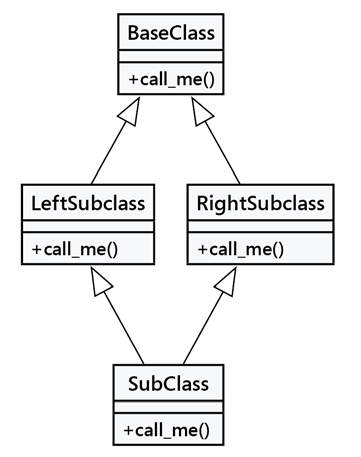

In [1]:
class BaseClass:
    num_base_calls = 0
    
    def call_me(self) -> None:
        print("Calling method on BaseClass")
        self.num_base_calls += 1
        
class LeftSubclass(BaseClass):
    num_left_calls = 0

    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on LeftSubclass")
        self.num_left_calls += 1

class RightSubclass(BaseClass):
    num_right_calls = 0
    
    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on RightSubclass")
        self.num_right_calls += 1

class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0
    
    def call_me(self) -> None:
        LeftSubclass.call_me(self)
        RightSubclass.call_me(self)
        print('Calling method on Subclass')
        self.num_sub_calls += 1

In [2]:
s = Subclass()
s.call_me()

Calling method on BaseClass
Calling method on LeftSubclass
Calling method on BaseClass
Calling method on RightSubclass
Calling method on Subclass


In [3]:
print(s.num_sub_calls, s.num_left_calls, s.num_right_calls, s.num_base_calls)

1 1 1 2


發現沒有設計好的多重繼承  
在基底 Class 被呼叫了兩次 !  
  
為了解決這個問題  
我們用 super() 去改寫   

In [11]:
class BaseClass:
    num_base_calls = 0
    
    def call_me(self) -> None:
        print("Calling method on BaseClass")
        self.num_base_calls += 1
        
class LeftSubclass_S(BaseClass):
    num_left_calls = 0

    def call_me(self) -> None:
        super().call_me()
        print("Calling method on LeftSubclass")
        self.num_left_calls += 1

class RightSubclass_S(BaseClass):
    num_right_calls = 0
    
    def call_me(self) -> None:
        super().call_me()
        print("Calling method on RightSubclass")
        self.num_right_calls += 1

class Subclass_S(LeftSubclass_S, RightSubclass_S):
    num_sub_calls = 0
    
    def call_me(self) -> None:
        super().call_me()
        print('Calling method on Subclass')
        self.num_sub_calls += 1

In [12]:
ss = Subclass_S()
ss.call_me()

Calling method on BaseClass
Calling method on RightSubclass
Calling method on LeftSubclass
Calling method on Subclass


In [13]:
print(ss.num_sub_calls, ss.num_left_calls, ss.num_right_calls, ss.num_base_calls)

1 1 1 1


In [14]:
from pprint import pprint
pprint(Subclass_S.__mro__)

(<class '__main__.Subclass_S'>,
 <class '__main__.LeftSubclass_S'>,
 <class '__main__.RightSubclass_S'>,
 <class '__main__.BaseClass'>,
 <class 'object'>)


從上方的 mro 方法  
Subclass_S super.call_me() 指向的是 LeftSubclass_S.call_me()    
LeftSubclass_S 的 super.call_me() 指向的是 RightSubclass_S.call_me() 而不是 BaseClass  
接下來 RightSubclass_S super.call_me 指向了 BaseClass.call_me()  
super() 確保了類別階層中每個方法都只執行一次

# 不同組的參數
---

接下來的事情更複雜  
在 Friend 我們想要繼承兩個父類別  
原本以不同組的參數呼叫兩個父類別的 \_\_init__  
> Contact.\_\_init__(self, name, email)  
> AddressHolder.\_\_init__(self, street, city, state, code)  
  
如何使用 super() 來管理不同組的參數?  
若第一個 super 呼叫傳入 name 和 email 參數給 Contact.\_\_init__  
然後Contact.\_\_init__呼叫 super  
他需要能夠傳遞參數給下一個方法，也就是 AddressHolder.\_\_init__  

此問題的唯一解  
是一開始就得計畫好  
必須將基底類別參數清單設計成不是每個子類別實作都需要的關鍵字參數  
還要確保方法自由接受預期外的參數並將他們傳遞給 super 呼叫  
以備之後的階層順序下會需要這些參數  


In [18]:
class Contact:
    all_contacts = []
    
    def __init__(self, name = '', email='', **kwargs):
        super().__init__(**kwargs)
        self.name = name
        self.email = email
        self.all_contacts.append(self)

class AddressHolder:
    def __init__(self, street = '', city = '', state = '', code = '', **kwargs):
        super().__init__(**kwargs)
        self.street = street
        self.city = city
        self.state = state
        self.code = code
        
class Friend(Contact, AddressHolder):
    def __init__(self, phone = '', **kwargs):
        super().__init__(**kwargs)
        self.phone = phone

上述程式碼中  
我們不會知道應該要給Friend.\_\_init__什麼參數  
因此這樣的程式設計需要對類別、方法加上文件、文字做解釋  
  
若我們想要在父類別重複使用變數呢  
上方程式碼的 Friend 類別中的 phone 就沒辦法傳到父類別  
因為它不在 kwargs 字典中  

有幾個方式可以確保 phone 參數能夠傳遞  
可以使用以下任一方式  
> * 不要將 phone 放在明確的關鍵字參數，把它放進 kwargs , 在 Friend 類別中以 self.phone = kwargs['phone']
> * 讓 phone 做為明確關鍵字，先更新 kwargs['phone'] = phone 後再用 super() 傳遞
> * 讓 phone 做為明確關鍵字，用 kwargs.update 將 dict(phone=phone) 或 {'phone' = phone} 更新至 kwargs 後再用 super 傳遞
> * 讓 phone 做為明確關鍵字，以 super().\_\_init__(phone = phone, \*\*kwargs) 